# 1. Sharpe Ratio 

- Sharpe Ratio allows us to use mathematics in order to cuantify the relationship between the Mean Daily Return and the volatility or the 
standard deviation of the daily returns
- is a measure for calculating risk-adjusted return
- the formula is: (Expected portf return - Risk-free return)/portf standard deviation
- it is an yearly metric - (mean yearly return, yearly standard deviation)

- if our data has a daily sampling rate, the annualized Sharpe Ratio is obtained by multiplying against a K-Factor based off
our sampling rate:
    daily : K = sqrt(252)
    weekly : K = sqrt(52)
    monthly : K = sqrt(12)
- Annualized Sharpe Ratio = K * Sharpe Ratio

In [80]:
import pandas as pd
import numpy as np
import quandl
import pandas_datareader.data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
start = pd.to_datetime('2017-01-01')
end = pd.to_datetime('2020-01-01')

In [32]:
aapl = pd.DataFrame(wb.DataReader('AAPL', data_source = 'yahoo', start = start, end = end)['Adj Close'])

In [33]:
aapl.head()

,Adj Close
Date,
2017-01-03,27.548414
2017-01-04,27.517582
2017-01-05,27.657520
2017-01-06,27.965857
2017-01-09,28.222006


In [34]:
cisco = pd.DataFrame(wb.DataReader('CSCO', data_source = 'yahoo', start = start, end = end)['Adj Close'])

In [35]:
cisco.head()

,Adj Close
Date,
2017-01-03,27.153379
2017-01-04,26.991968
2017-01-05,27.054739
2017-01-06,27.108545
2017-01-09,27.063707


In [36]:
cisco.iloc[0]['Adj Close']

27.153379440307617

In [37]:
ibm = pd.DataFrame(wb.DataReader('IBM', data_source = 'yahoo', start = start, end = end)['Adj Close'])

In [38]:
amzn = pd.DataFrame(wb.DataReader('AMZN', data_source = 'yahoo', start = start, end = end)['Adj Close'])

# Normalize Prices

 - This is the same as cumulative daily returns -> each Adjusted Price divided by the first one

In [39]:
for stock in (aapl,cisco,ibm,amzn):
    stock['Normed Return'] = stock['Adj Close'] / stock.iloc[0]['Adj Close']

In [40]:
cisco.head()

,Adj Close,Normed Return
Date,,
2017-01-03,27.153379,1.000000
2017-01-04,26.991968,0.994056
2017-01-05,27.054739,0.996367
2017-01-06,27.108545,0.998349
2017-01-09,27.063707,0.996698


# Allocations (Normed Return * Allocation)

Let's pretend we had the following allocations for our total portfolio:

- 30% in Apple
- 20% in Google/Alphabet
- 40% in Amazon
- 10% in IBM
- Let's have these values be reflected by multiplying our Norme Return by our Allocations

In [41]:
for stock, alloc in zip([aapl,cisco,amzn,ibm],[.3,.2,.4,.1]):
    stock['Allocation'] = stock['Normed Return'] * alloc

In [42]:
aapl.head()

,Adj Close,Normed Return,Allocation
Date,,,
2017-01-03,27.548414,1.000000,0.300000
2017-01-04,27.517582,0.998881,0.299664
2017-01-05,27.657520,1.003961,0.301188
2017-01-06,27.965857,1.015153,0.304546
2017-01-09,28.222006,1.024451,0.307335


# Investment (Allocations * 1000000)

Let's pretend we invested a million dollars in this portfolio

In [43]:
for stock in [aapl,cisco,amzn,ibm]:
    stock['Position Values'] = stock['Allocation'] * 1000000

In [44]:
aapl.head()

,Adj Close,Normed Return,Allocation,Position Values
Date,,,,
2017-01-03,27.548414,1.000000,0.300000,300000.000000
2017-01-04,27.517582,0.998881,0.299664,299664.238852
2017-01-05,27.657520,1.003961,0.301188,301188.156199
2017-01-06,27.965857,1.015153,0.304546,304545.913078
2017-01-09,28.222006,1.024451,0.307335,307335.358124


# Total Portfolio Value

In [45]:
portf_value = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']], axis=1)

In [47]:
portf_value.columns = ['AAPL Position','CISCO Position','IBM Position','AMZN Position']

In [48]:
portf_value.head()

,AAPL Position,CISCO Position,IBM Position,AMZN Position
Date,,,,
2017-01-03,300000.000000,200000.000000,100000.000000,400000.000000
2017-01-04,299664.238852,198811.114574,101238.089246,401862.889511
2017-01-05,301188.156199,199273.457345,100903.153161,414213.133018
2017-01-06,304545.913078,199669.771219,101399.599757,422460.763084
2017-01-09,307335.358124,199339.514341,100275.123762,422954.343933


In [51]:
portf_value['Total position'] = portf_value.sum(axis = 1)

In [52]:
portf_value.head()

,AAPL Position,CISCO Position,IBM Position,AMZN Position,Total position
Date,,,,,
2017-01-03,300000.000000,200000.000000,100000.000000,400000.000000,1.000000e+06
2017-01-04,299664.238852,198811.114574,101238.089246,401862.889511,1.001576e+06
2017-01-05,301188.156199,199273.457345,100903.153161,414213.133018,1.015578e+06
2017-01-06,304545.913078,199669.771219,101399.599757,422460.763084,1.028076e+06
2017-01-09,307335.358124,199339.514341,100275.123762,422954.343933,1.029904e+06


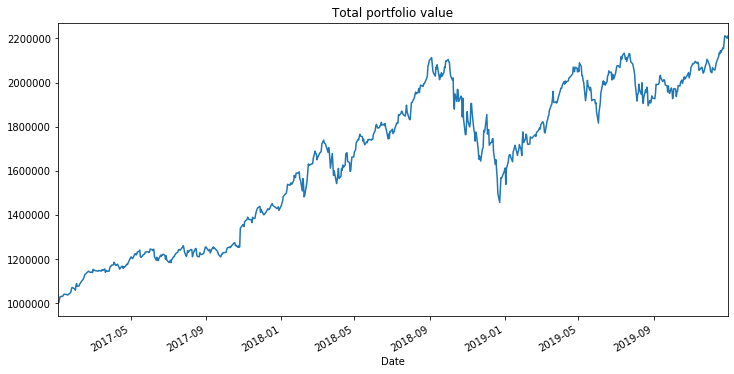

In [55]:
portf_value['Total position'].plot(figsize = (12,6), title = 'Total portfolio value')

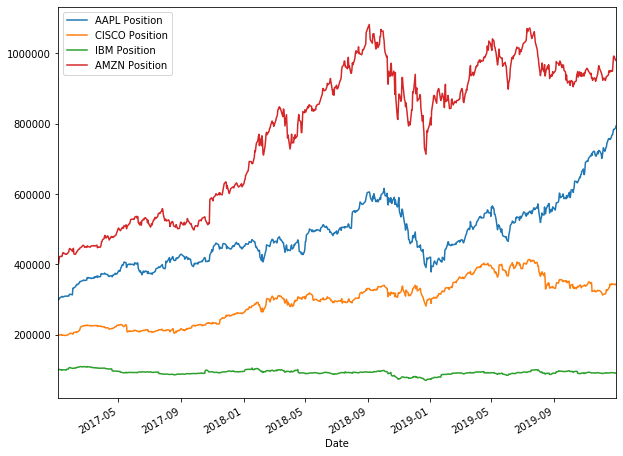

In [56]:
portf_value.drop('Total position', axis = 1).plot(figsize = (10,8))

# Portfolio Statistics

# Daily Returns

In [57]:
portf_value['Daily Return'] = portf_value['Total position'].pct_change(1)

In [60]:
portf_value.tail()

,AAPL Position,CISCO Position,IBM Position,AMZN Position,Total position,Daily Return
Date,,,,,,
2019-12-24,768616.652299,343372.296705,91863.692541,949598.631501,2.153451e+06,-0.001840
2019-12-26,783866.294296,343875.380711,91816.064608,991824.040711,2.211382e+06,0.026901
2019-12-27,783568.855407,343300.479742,92061.066745,992370.714624,2.211301e+06,-0.000036
2019-12-30,788219.453680,342006.875294,90386.860336,980211.528402,2.200825e+06,-0.004738
2019-12-31,793978.551859,344665.901153,91223.952767,980715.701950,2.210584e+06,0.004434


# Cumulative Return

In [62]:
cum_return = (portf_value['Total position'][-1]/portf_value['Total position'][0] - 1)*100
cum_return

121.05841077287502

In [63]:
print("Our cumulative return is %s" % cum_return)

Our cumulative return is 121.05841077287502


# Avg Daily Return

In [64]:
portf_value['Daily Return'].mean()

0.001144929999763692

In [65]:
print("Our average daily return is %s" % (portf_value['Daily Return'].mean()))

Our average daily return is 0.001144929999763692


# Std Daily Return

In [66]:
portf_value['Daily Return'].std()

0.013491856858322732

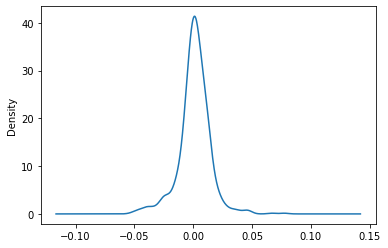

In [68]:
portf_value['Daily Return'].plot(kind = 'kde')

C:\Users\mariu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\mariu\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


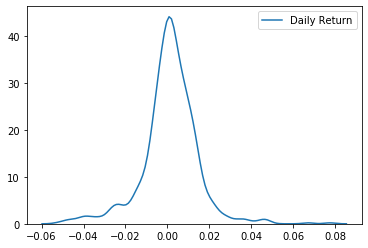

In [70]:
sns.kdeplot(portf_value['Daily Return'])

# Sharpe Ratio

- SR > 1 is considered acceptable to good, depending on the risk tolerance
- SR > 2 is considered good
- SR > 3 is considered excellent
- SR allows us to see how much greater a return is obtained in relation to the aditional risk taken to generate that return

In [71]:
SR = portf_value['Daily Return'].mean() / portf_value['Daily Return'].std()
SR

0.08486081729049906

In [72]:
Annual_SR = SR * (252 ** 0.5)
Annual_SR

1.3471237116261034

# 2. Portfolio optimization

- randomly guessing and checking -> MonteCarlo simulation
- randomly aasign a weight to each security, then calculate its mean daily return and std dev of daily return
- calculate Sharpe Ratio for all randomly selected allocations
- plot the allocations, showing return (y axis) vs volatility (x axis), colored by Sharpe Ratio
- look for the allocation with the best Sharpe Ratio 

- as guessing and checking is not very efficient => use math to find out the best SR for any portfolio
- Optimization Algorithm -> we need to understand minimization
- if we have 2 equations: y = x * x and y = (2-x)(2-x)  -> what value of x will minimize y: 0, respectively 2
- using a minimizer allows us to build an optimizer 
- use scipy

- so, we want to maximize the SR -> we can create an OPTIMIZER, in order to minimize the negative SR
- use SCIPY buitin optimization algorithms to calculate the optimal weight allocation for the portfolio

# 2.1 Monte Carlo Simulation for Optimization Search

In [73]:
stocks = ['AAPL','IBM','AMZN','CSCO']
df = pd.DataFrame()
for s in stocks:
    df[s] = wb.DataReader(s, data_source = 'yahoo', start = start, end = end)['Adj Close']
df.head()

,AAPL,IBM,AMZN,CSCO
Date,,,,
2017-01-03,27.548414,141.637695,753.669983,27.153379
2017-01-04,27.517582,143.391296,757.179993,26.991968
2017-01-05,27.657520,142.916901,780.450012,27.054739
2017-01-06,27.965857,143.620056,795.989990,27.108545
2017-01-09,28.222006,142.027374,796.919983,27.063707


Mean daily returns

In [76]:
mean_daily_ret = pd.DataFrame(df.pct_change(1).mean())
mean_daily_ret.columns = ['Mean daily return']
mean_daily_ret

,Mean daily return
AAPL,0.001414
IBM,-0.000038
AMZN,0.001341
CSCO,0.000825


Correlation between the returns -> pearson correlation coefficients between each stock

In [77]:
df.pct_change(1).corr()

,AAPL,IBM,AMZN,CSCO
AAPL,1.000000,0.385997,0.601882,0.531938
IBM,0.385997,1.000000,0.367455,0.483571
AMZN,0.601882,0.367455,1.000000,0.520426
CSCO,0.531938,0.483571,0.520426,1.000000


Logarithmic returns & Arithmetic returns -> from now on we will use Logarithmic returns, instead of arithmetic returns
- they are almost the same, but most technical analysis techniques require detrending / normalizing the time series -> it is nicer to use log returns 

* Daily arithmetic returns

In [78]:
df.pct_change(1).head()

,AAPL,IBM,AMZN,CSCO
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,-0.001119,0.012381,0.004657,-0.005944
2017-01-05,0.005085,-0.003308,0.030732,0.002326
2017-01-06,0.011148,0.004920,0.019912,0.001989
2017-01-09,0.009159,-0.011090,0.001168,-0.001654


* Log returns

In [81]:
log_ret = np.log(df/df.shift(1))
log_ret.head()

,AAPL,IBM,AMZN,CSCO
Date,,,,
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,-0.001120,0.012305,0.004646,-0.005962
2017-01-05,0.005073,-0.003314,0.030270,0.002323
2017-01-06,0.011087,0.004908,0.019716,0.001987
2017-01-09,0.009118,-0.011151,0.001168,-0.001655


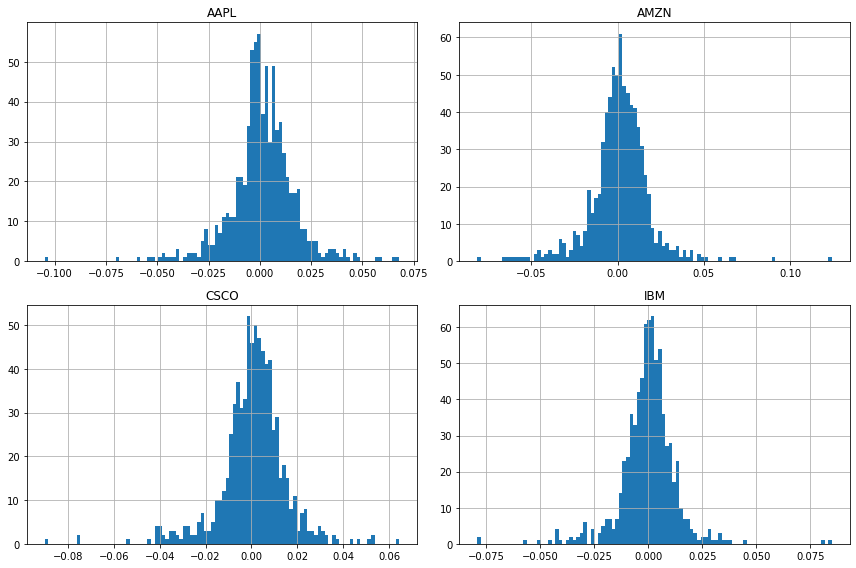

In [83]:
log_ret.hist(bins = 100, figsize = (12,8))
plt.tight_layout()

Mean log return

In [84]:
log_ret.mean()

AAPL    0.001293
IBM    -0.000122
AMZN    0.001191
CSCO    0.000723
dtype: float64

Annualized Covariance of the columns

In [103]:
log_ret.cov() * 252

,AAPL,IBM,AMZN,CSCO
AAPL,0.061148,0.019813,0.040774,0.029905
IBM,0.019813,0.042645,0.020970,0.022678
AMZN,0.040774,0.020970,0.074970,0.032451
CSCO,0.029905,0.022678,0.032451,0.051842


# Single run for some random allocations

In [86]:
df.columns

Index(['AAPL', 'IBM', 'AMZN', 'CSCO'], dtype='object')

In [92]:
np.random.seed(101)    #in order to get the same random numbers every time
print('Random weights')
weights = np.array(np.random.random(4))
weights

Random weights


array([0.51639863, 0.57066759, 0.02847423, 0.17152166])

In [96]:
print ('Rebalanced weights')
weights = weights / np.sum(weights)
weights

Rebalanced weights


array([0.40122278, 0.44338777, 0.02212343, 0.13326603])

 * Expected Portfolio Return

In [97]:
exp_ret = np.sum((log_ret.mean() * weights)*252)
exp_ret

0.14796889378029413

* Expected Volatility

In [98]:
exp_vol = np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*252,weights)))
exp_vol

0.1828626478616836

* Sharpe Ratio

In [105]:
SR = exp_ret / exp_vol

In [106]:
SR

0.8091805270818186

# Simulating Thousands of Possible Allocations (randomly)

- all the above code, repeated thousands of times

In [114]:
np.random.seed(101)
num_portf = 5000
all_weights = np.zeros((num_portf, len(df.columns)))   #rows = number of portfolios; columns = number of stocks in df
ret_array = np.zeros(num_portf)   #an array to hold the returns
vol_array = np.zeros(num_portf)   #an array to hold the volatilities
sharpe_array = np.zeros(num_portf)  #an array for sharpe ratios

for ind in range(num_portf):
    weights = np.array(np.random.random(4))
    weights /= np.sum(weights)
    #Save the weights
    all_weights[ind,:] = weights    #save the weights for the first simulation, on the first row
    
    exp_ret = np.sum((log_ret.mean() * weights) * 252)
    #Save the expected returns
    ret_array[ind] = exp_ret
    
    exp_volat = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252,weights)))
    #Save the expected volatilities
    vol_array[ind] = exp_volat
    
    SR = exp_ret / exp_volat
    #Save the SR
    sharpe_array[ind] = ret_array[ind] / vol_array[ind]

* The best SR

In [115]:
sharpe_array.max()

1.3630249206224059

* The position of the best SR

In [117]:
sharpe_array.argmax()

365

* The weights situated at the index of the best SR -> the optimal allocation

In [118]:
all_weights[365,:]

array([0.58862665, 0.00114527, 0.37684942, 0.03337866])

* Plot the data -> get the volatility and the return colored by Sharpe Ratio

Text(0, 0.5, 'Return')

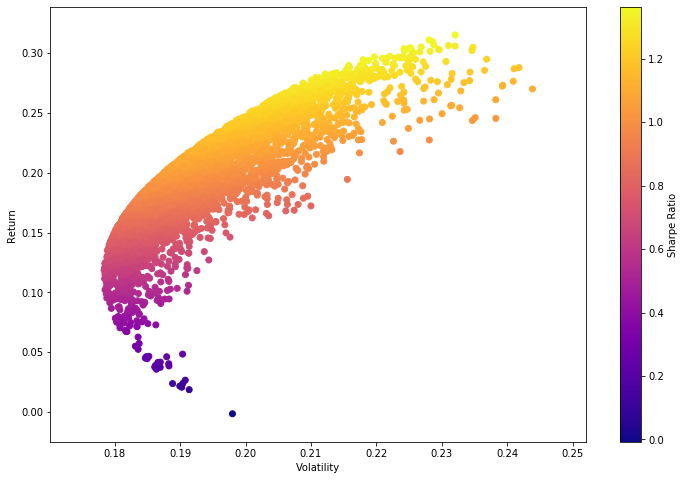

In [119]:
plt.figure(figsize = (12,8))
plt.scatter(vol_array, ret_array, c = sharpe_array, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

* Put a red dot on the maximum Sharpe Ratio

In [120]:
max_sr_ret = ret_array[sharpe_array.argmax()]
max_sr_vol = vol_array[sharpe_array.argmax()]
(max_sr_ret, max_sr_vol)

(0.31087422264294, 0.2280766976006453)

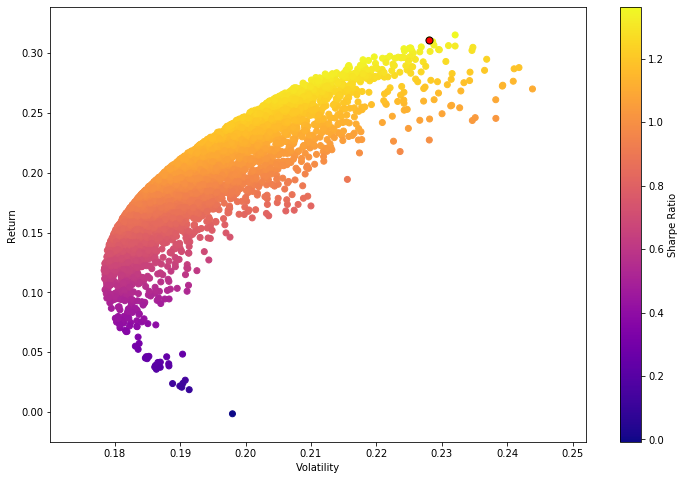

In [121]:
plt.figure(figsize = (12,8))
plt.scatter(vol_array, ret_array, c = sharpe_array, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol, max_sr_ret, c='red', s = 50, edgecolors = 'black')

# 2.2 Move on from random allocation to performing MATHEMATICAL OPTIMIZATION

* Create a function that takes in some weights and returns an array of the returns, volatilities and sharpe ratios

In [122]:
def get_ret_vol_sr(weights):
    #make sure the weights are in a numpy array
    weights = np.array(weights)
    
    ret = np.sum(log_ret.mean() * weights) * 252
    
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    sr = ret/vol
    
    return np.array([ret, vol, sr])

In [123]:
from scipy.optimize import minimize

* Create some helper functions

In [124]:
#first, create a function that takes some weight allocations, and returns the negative sharpe ratio 
#(minimize the negative sharpe ratio, by multiplying the sharpe ratio with -1)

def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2] * -1

In [125]:
#next we have constraints
#one of them is check_sum; as the allocations have to add up to 1
#we create a function that returns 0 if the sum of the weights 1; if not, it returns how far we are from 1

def check_sum(weights):
    return np.sum(weights) - 1

In [126]:
#create the variable constraints, which is a tuple with a dictionary inside 

cons = ({'type':'eq','fun':check_sum})   #eq = equation

In [127]:
#we also create the variable bounds, which is a tuple of tuples 

bounds = ((0,1),(0,1),(0,1),(0,1))    #the bounds of the weights have to be between 0 and 1

In [128]:
#start with an initial guess, of equal allocation 

init_guess = [0.5, 0.5, 0.5, 0.5]

In [129]:
#put all these in the minimization function

opt_results = minimize(neg_sharpe, init_guess, method = 'SLSQP', bounds = bounds, constraints = cons )    

#first arg is the function we want to minimize
#third arg is an algorithm we can use to minimize the function; SLSQP is used for most basic tasks

In [130]:
opt_results

     fun: -1.37076277874608
     jac: array([ 1.91062689e-04,  6.48237497e-01, -4.62919474e-04,  8.72164965e-05])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([7.02950202e-01, 2.10281011e-16, 2.91232045e-01, 5.81775271e-03])

In [131]:
#to find the actual allocation
opt_results.x

array([7.02950202e-01, 2.10281011e-16, 2.91232045e-01, 5.81775271e-03])

In [132]:
#obtain the return, volatility and sharpe ratio
get_ret_vol_sr(opt_results.x)

array([0.3174302 , 0.23157194, 1.37076278])

* Now we have our optimal results; 
* next, we will check all optimal portfolios -> the Efficient Frontier (set of optimal portfolios that offer the highest 
return for a given risk)

In [133]:
#frontier values -> from 0 to 0.3, as the returns are not bigger than 0.3
frontier_y = np.linspace(0, 0.3, 100)   #100 points from 0 to 0.3

In [134]:
#minimize the volatility
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]   #no need to multiply by -1 

In [136]:
frontier_volatility = []
#for each possible return on the y axis, check the constraints: first checks the sum to be 1; 
#the second constraint: for some weights, we get the first item of get_ret_vol_sr, which is the returns, and substract
#the possible return -> this is because in our frontier we have the maximum returns 
for possible_return in frontier_y:
    cons = ({'type':'eq','fun':check_sum},
           {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility, init_guess, method = 'SLSQP', bounds = bounds, constraints = cons)
    
    #append the result to the frontier volatility list
    frontier_volatility.append(result['fun']) 

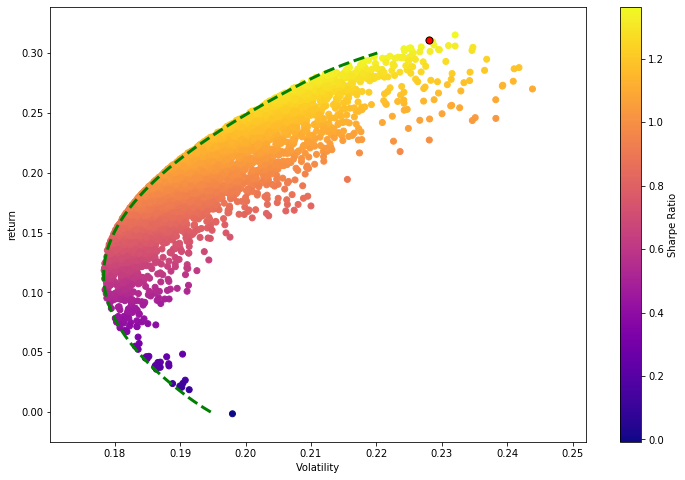

In [137]:
plt.figure(figsize=(12,8))
plt.scatter(vol_array, ret_array, c = sharpe_array, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('return')

plt.scatter(max_sr_vol, max_sr_ret, c = 'red', s = 50, edgecolors = 'black')
plt.plot(frontier_volatility, frontier_y, 'g--', linewidth = 3)

In [ ]:
- we have plotted a line that represents: for each desired level of risk, the best return 